# 2.21(a)

$$
\begin{aligned}
\begin{cases}
y[n] &= x[n] * h[n] \\
x[n] &= \alpha^n u[n]\\
h[n] &= \beta^n u[n] \\
\alpha &\neq \beta
\end{cases}
\end{aligned}
$$

## Answer

Based on the definition of convolution, we have  
$$
y[n] = \sum_{k=0}^{n} x[k]\, h[n-k].
$$

Substituting $x[k] = \alpha^k\, u[k]$ and $h[n-k] = \beta^{n-k}\, u[n-k]$ gives  
$$
y[n] = \sum_{k=0}^{n} \alpha^k\, \beta^{n-k}.
$$

Factor out $\beta^n$ to obtain  
$$
y[n] = \beta^n \sum_{k=0}^{n} \left(\frac{\alpha}{\beta}\right)^k.
$$

Using the finite geometric series formula (with $\alpha \neq \beta$)  
$$
\sum_{k=0}^{n} \left(\frac{\alpha}{\beta}\right)^k = \frac{1 - \left(\frac{\alpha}{\beta}\right)^{n+1}}{1 - \frac{\alpha}{\beta}}.
$$

Substituting the above into the equation, we get  
$$
y[n] = \beta^n\, \frac{1 - \left(\frac{\alpha}{\beta}\right)^{n+1}}{1 - \frac{\alpha}{\beta}} = \frac{\beta^{n+1} - \alpha^{n+1}}{\beta - \alpha}.
$$

Including the unit step function $u[n]$, the final result is  
$$
y[n] = \frac{\beta^{n+1} - \alpha^{n+1}}{\beta - \alpha}\, u[n].
$$

Thus, the final answer is:
$$
y[n] = \frac{\beta^{n+1} - \alpha^{n+1}}{\beta-\alpha}\, u[n].
$$

# 2.22(c)

## Answer

$$
\begin{aligned}
y(t)&=\int_{-\infty}^{+\infty} x(\tau)h(t-\tau)d\tau\\[1ex]
&=\int_{\max(0,t-3)}^{\min(2,t-1)} 2\sin(\pi\tau)d\tau.
\end{aligned}
$$

For different values of t, the integration limits change:

• For $t < 1$, the interval is empty, so $y(t)=0$.

• For $1 ≤ t ≤ 3$, the limits are $τ=0$ to $τ=t−1$, and
  $$
  y(t)=2\int_{0}^{t-1}\sin(\pi\tau)d\tau
  =\frac{2}{\pi}\Bigl[1-\cos\bigl(\pi(t-1)\bigr)\Bigr].
  $$

• For $3 ≤ t ≤ 5$, the limits are $τ=t−3$ to $τ=2$, and
  $$
  y(t)=2\int_{t-3}^{2}\sin(\pi\tau)d\tau
  =\frac{2}{\pi}\Bigl[\cos\bigl(\pi(t-3)\bigr)-1\Bigr].
  $$

• For $t > 5$, the interval is again empty, so $y(t)=0$.

Thus, the convolution result is:

$$
y(t)=
\begin{cases}
0, & t<1,\\[1ex]
\displaystyle \frac{2}{\pi}\Bigl[1-\cos\bigl(\pi(t-1)\bigr)\Bigr], & 1\le t\le 3,\\[1ex]
\displaystyle \frac{2}{\pi}\Bigl[\cos\bigl(\pi(t-3)\bigr)-1\Bigr], & 3\le t\le 5,\\[1ex]
0, & t>5.
\end{cases}
$$

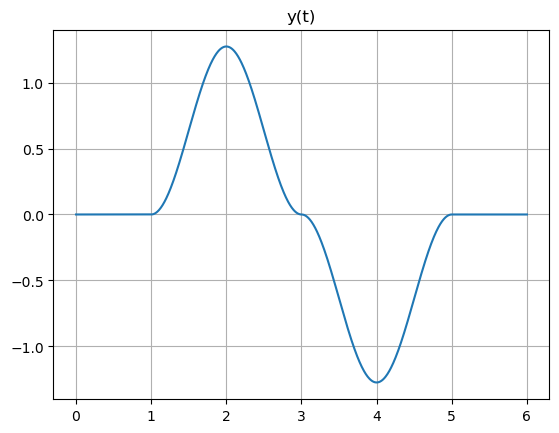

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def draw(x, y, title):
    plt.plot(x, y)
    plt.grid()
    plt.title(title)
    plt.show()

x = np.linspace(0, 6, 1000)
y = []
for t in x:
    if t < 1:
        y.append(0)
    elif t <= 3:
        y.append(2/np.pi * (1 - np.cos(np.pi * (t - 1))))
    elif t <= 5:
        y.append(2/np.pi * (np.cos(np.pi * (t - 3)) - 1))
    else:
        y.append(0)
draw(x, y, "y(t)")

# 2.47

Given a linear time-invariant system with impulse response $h_0(t)$, its output $y_0(t)$ for the input $x_0(t)$ is given by

$$
y_0(t) = \begin{cases}
\frac{1}{2}t, & 0 \le t \le 2,\\[1ex]
0, & \text{otherwise}
\end{cases}
$$
In each case, determine whether there is sufficient information to uniquely determine the output $y(t)$ when the input is $x(t)$ and the system’s impulse response is $h_0(t)$.

## (b)

$$
x(t) = x_0(t) - x_0(t-2), \quad h(t) = h_0(t)
$$

### Answer



$$
\begin{aligned}
y(t) &= y_0(t) - y_0(t-2)\\[1ex]
&=
\begin{cases}
\displaystyle \frac{1}{2}t, & 0\le t < 2,\\[1ex]
\displaystyle -\frac{1}{2}(t-2), & 2\le t < 4,\\[1ex]
0, & \text{otherwise.}
\end{cases}
\end{aligned}
$$

Using linearity and time invariance, we can uniquely determine $y(t)$ from the known $y_0(t)$.

## (d)

$$
x(t) = x_0(-t), \quad h(t) = h_0(t)
$$

### Answer

$$
y(t) = \int_{-\infty}^{\infty} x_0(-\tau)\,h_0(t-\tau)\,d\tau.
$$

Even though we know the convolution result

$$
y_0(t)=\int_{-\infty}^{\infty}x_0(\tau)\,h_0(t-\tau)\,d\tau,
$$

the transformation of the input (time reversal) does not yield a simple relation between $y(t)$ and $y_0(t)$ unless additional properties (such as symmetry) of $h_0(t)$ or more details about $x_0(t)$ are assumed. In general, with only the knowledge of $y_0(t)$ and without further information about $x_0(t)$ or $h_0(t)$, we do not have sufficient information to uniquely determine $y(t)$.

## (e)

$$
x(t) = x_0(t), \quad h(t) = h_0(-t)
$$

### Answer

Using time-reversal properties, we can show that

$$
y(t)=\int_{-\infty}^{+\infty}x_0(-\tau)h_0\bigl(-(t-\tau)\bigr)d\tau=\int_{-\infty}^{+\infty}x_0(u)h_0\bigl(-t-u\bigr)du=y_0(-t).
$$

Since

$$
y_0(t)=
\begin{cases}
\frac{1}{2}t, & 0\le t\le 2,\\[1ex]
0, & \text{otherwise},
\end{cases}
$$

it follows that

$$
y(t)=y_0(-t)=
\begin{cases}
\frac{1}{2}(-t), & -2\le t\le 0,\\[1ex]
0, & \text{otherwise.}
\end{cases}
$$

Thus, the output is uniquely determined by time reversing the known response.

## (f)

$$
x(t) = x_0'(t), \quad h(t) = h_0'(t)
$$

### Answer

Using the differentiation property of convolutions, we have

$$
\mathcal{F}\{x_0'(t)\} = j\omega X_0(\omega), \quad \mathcal{F}\{h_0'(t)\} = j\omega H_0(\omega).
$$

Thus,

$$
\mathcal{F}\{y(t)\} = (j\omega)^2 X_0(\omega)H_0(\omega) = -\omega^2 Y_0(\omega),
$$

which implies

$$
y(t) = y_0''(t).
$$

Since

$$
y_0(t) = \begin{cases}
\frac{1}{2}t, & 0 \le t \le 2,\\[1ex]
0, & \text{otherwise},
\end{cases}
$$

its second derivative (in the distributional sense) is

$$
y_0''(t) = \frac{1}{2}\delta(t) - \frac{1}{2}\delta(t-2).
$$

Hence, the uniquely determined output is

$$
y(t) = \frac{1}{2}\delta(t) - \frac{1}{2}\delta(t-2).
$$


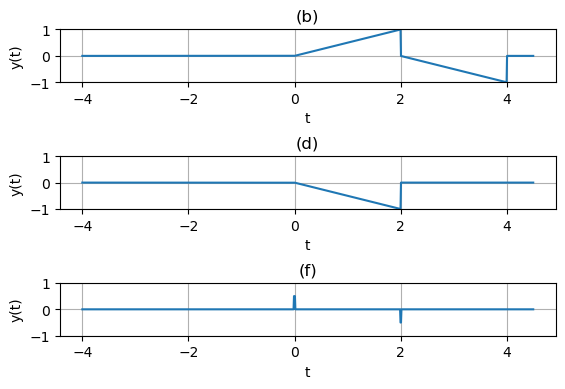

In [30]:
def draw_sub(x, y, title, sub):
    plt.subplot(6, 1, sub)
    plt.plot(x, y)
    plt.grid()
    plt.ylabel("y(t)")
    plt.xlabel("t")
    plt.ylim(-1, 1)
    plt.title(title)
x = np.linspace(-4, 4.5, 1000)
y = []
for t in x:
    if 0 <= t < 2:
        y.append(t / 2)
    elif 2 <= t < 4:
        y.append(-1/2*(t - 2))
    else:
        y.append(0)
draw_sub(x, y, "(b)", 1)
y = []
for t in x:
    if 0 <= t < 2:
        y.append(- 1/2 * t)
    else:
        y.append(0)
draw_sub(x, y, "(d)", 3)
eps = 1e-2
def delta(x):
    if abs(x) < eps:
        return 1
    else:
        return 0

y = np.array([1/2 * delta(t) - 1/2 * delta(t - 2) for t in x])
draw_sub(x, y, "(f)", 5)

# 2.28(c)

$h[n]$ is the unit impulse response of a discrete-time LTI system. The task is to determine if the system is causal and/or BIBO stable.

$h[n]$ is defined as
$$
h[n] = \left(\frac{1}{2}\right)^n u[-n],
$$
where $u[-n]$ equals $1$ for $n ≤ 0$ and $0$ for $n > 0$.

## Answer

• A causal system requires $h[n] = 0$ for $n < 0$, but here $h[n]$ is nonzero for some negative $n$. Therefore, the system is non‐causal.

• For BIBO stability, the sum 
$$
\sum_{n=-\infty}^{\infty} |h[n]|
$$ 
must be finite. For n ≤ 0, we have
$$
|h[n]| = \left(\frac{1}{2}\right)^n = 2^{-n},
$$
so the relevant sum becomes
$$
\sum_{n=-\infty}^{0} 2^{-n} = \sum_{m=0}^{\infty} 2^{m},
$$
which diverges. Hence, the system is unstable.

In summary, the system is neither causal nor stable.

# 2.29(g)

We are given the impulse response of a continuous‐time LTI system as

$$
h(t) = \Bigl(2e^{-t} - e^{\frac{t-100}{100}}\Bigr)u(t).
$$

## Answer

Because of the factor $u(t)$, we have $h(t)=0$ for $t<0$. This means the system does not respond before $t=0$, so it is causal.

To check BIBO stability, we need to evaluate whether

$$
\int_{-\infty}^{\infty} \left| h(t) \right| dt = \int_{0}^{\infty} \left|2e^{-t} - e^{\frac{t-100}{100}}\right| dt
$$

is finite. Notice that the second term can be rewritten as

$$
e^{\frac{t-100}{100}} = e^{\frac{t}{100}-1}.
$$

For large $t$, the term $2e^{-t}$ decays to zero, while $e^{\frac{t}{100}-1}$ grows exponentially (albeit slowly). As a result, $\left|h(t)\right|$ for large $t$ behaves like

$$
\left|h(t)\right| \sim e^{\frac{t}{100}-1},
$$

and the integral

$$
\int_0^\infty e^{\frac{t}{100}-1}dt = e^{-1}\int_0^\infty e^{\frac{t}{100}} dt
$$

diverges. Therefore, the impulse response is not absolutely integrable, implying that the system is not BIBO stable.

In summary:

- The system is causal.
- The system is not BIBO stable.